In [1]:
import tensorflow as tf
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np


In [2]:
boston = load_boston()
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
x_data = boston.data
y_data = boston.target.reshape(boston.target.size,1)

In [4]:
y_data.shape, x_data.shape

((506, 1), (506, 13))

In [5]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data)
# standard_scale = preprocessing.StandardScaler().fit(x_data)
x_scaled_data = minmax_scale.transform(x_data)

x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)

In [8]:
# Linear regression (Wx + b).
@tf.function
def linear_regression(x, W ,b):
    return tf.add(tf.matmul(x,W),b)

# Mean square error.
@tf.function
def loss_function(y_pred, y_true, W=None):
    return tf.reduce_mean(
        tf.pow(y_pred-y_true, 2) / 2 )


@tf.function
def mean_square(y_pred, y_true):
    return tf.reduce_sum(
        tf.pow(y_pred-y_true, 2)) / (2 * len(y_true))

In [9]:
# Optimization process. 
def run_optimization(X, Y, W, b):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X, W, b)
        loss = loss_function(pred, Y, W)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [15]:
# Parameters.
learning_rate = 0.01
training_steps = 5000
display_step = 500

In [16]:
# Weight and Bias, initialized randomly.
W = tf.Variable(np.random.randn(13,1),  name="weight")
b = tf.Variable(np.random.randn(1,), name="bias")

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)


history = {"train_mse": [], "val_mse": []}
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization(X_train, y_train, W, b)
    
    if step % display_step == 0:
        pred = linear_regression(X_train, W, b)
        train_mse = mean_square(pred, y_train)
        val_mse = mean_square(linear_regression(X_test, W, b), y_test)
        
        history["train_mse"].append(train_mse)
        history["val_mse"].append(val_mse)
        
        print("step: %i, loss: %f, vall_lss: %f" % (step, train_mse, val_mse))

step: 500, loss: 11.760760, vall_lss: 18.405075
step: 1000, loss: 11.366852, vall_lss: 19.417355
step: 1500, loss: 11.243057, vall_lss: 19.774263
step: 2000, loss: 11.153298, vall_lss: 19.804684
step: 2500, loss: 11.072948, vall_lss: 19.710151
step: 3000, loss: 10.998510, vall_lss: 19.570043
step: 3500, loss: 10.929116, vall_lss: 19.415083
step: 4000, loss: 10.864328, vall_lss: 19.257615
step: 4500, loss: 10.803808, vall_lss: 19.102837
step: 5000, loss: 10.747265, vall_lss: 18.953005


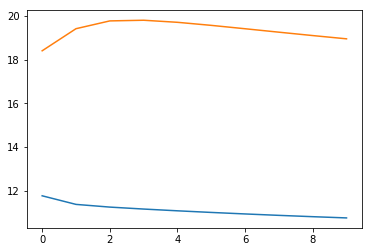

In [17]:
from matplotlib import pyplot
pyplot.plot(history['train_mse'])
pyplot.plot(history['val_mse'])
pyplot.show()

In [18]:
# Mean square error.
@tf.function
def loss_function(y_pred, y_true, W=None):
    return tf.reduce_mean(
        tf.pow(y_pred-y_true, 2) + 0.8 * tf.nn.l2_loss(W) / 2)

In [21]:
# Parameters.
learning_rate = 0.01
training_steps = 5000
display_step = 500

In [22]:
# Weight and Bias, initialized randomly.
W = tf.Variable(np.random.randn(13,1),  name="weight")
b = tf.Variable(np.random.randn(1,), name="bias")

history = {"train_mse": [], "val_mse": []}
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization(X_train, y_train, W, b)
    
    if step % display_step == 0:
        pred = linear_regression(X_train, W, b)
        train_mse = mean_square(pred, y_train)
        val_mse = mean_square(linear_regression(X_test, W, b), y_test)
        
        history["train_mse"].append(train_mse)
        history["val_mse"].append(val_mse)
        
        print("step: %i, loss: %f, val_loss: %f" % (step, train_mse, val_mse))

step: 500, loss: 12.472456, vall_lss: 17.535427
step: 1000, loss: 12.086236, vall_lss: 17.079238
step: 1500, loss: 11.807223, vall_lss: 16.662486
step: 2000, loss: 11.592382, vall_lss: 16.334297
step: 2500, loss: 11.427092, vall_lss: 16.078140
step: 3000, loss: 11.300293, vall_lss: 15.878472
step: 3500, loss: 11.203361, vall_lss: 15.722978
step: 4000, loss: 11.129567, vall_lss: 15.602005
step: 4500, loss: 11.073668, vall_lss: 15.507998
step: 5000, loss: 11.031578, vall_lss: 15.435042


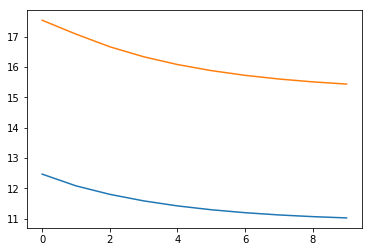

In [23]:
from matplotlib import pyplot
pyplot.plot(history['train_mse'])
pyplot.plot(history['val_mse'])
pyplot.show()

In [144]:
# Weight and Bias, initialized randomly.
W = tf.Variable(np.random.randn(13,1)/np.sqrt(1/13),  name="init_var", dtype=tf.float64)  
b = tf.Variable(np.random.randn(1), name="bias", dtype=tf.float64)

In [145]:
# Parameters.
learning_rate = 0.01
training_steps = 5000
display_step = 500

In [ ]:
history = {"train_mse": [], "val_mse": []}
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization(X_train, y_train, W, b)
    
    if step % display_step == 0:
        pred = linear_regression(X_train, W, b)
        train_mse = mean_square(pred, y_train)
        val_mse = mean_square(linear_regression(X_test, W, b), y_test)
        
        history["train_mse"].append(train_mse)
        history["val_mse"].append(val_mse)
        
        print("step: %i, loss: %f, vall_lss: %f" % (step, train_mse, val_mse))

step: 500, loss: 12.499511, vall_lss: 17.617467
step: 1000, loss: 12.148673, vall_lss: 17.172198
step: 1500, loss: 11.856117, vall_lss: 16.736630
step: 2000, loss: 11.630068, vall_lss: 16.392219
step: 2500, loss: 11.456053, vall_lss: 16.123311
step: 3000, loss: 11.322480, vall_lss: 15.913668
step: 3500, loss: 11.220294, vall_lss: 15.750376
step: 4000, loss: 11.142433, vall_lss: 15.623311
